In [1]:
# Show current path
from pathlib import Path
print(Path.cwd())

/Users/onepinch/Workspace/tas-art/scenario


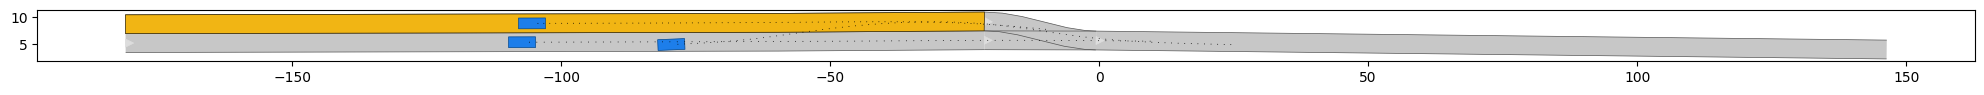

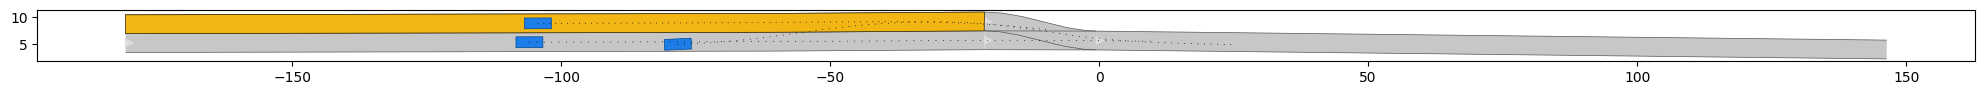

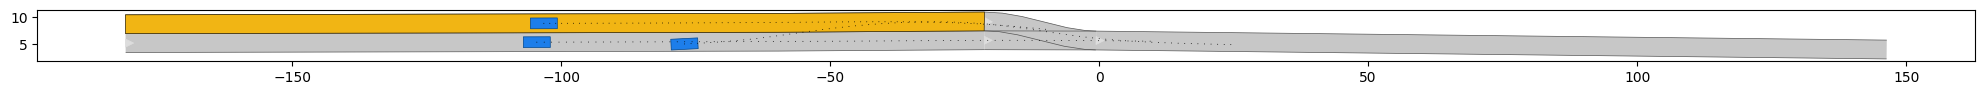

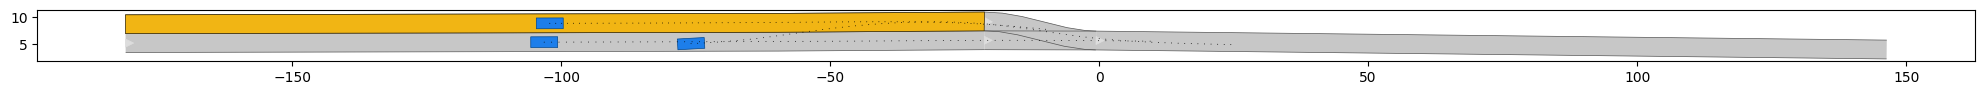

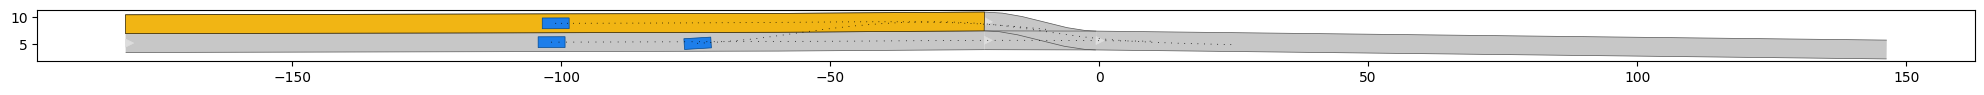

In [2]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

# Yuhui: note the mathplotlib need to be < 3.6. See in the requirements.txt
# generate path of the file to be opened, also the following fix for latent error.
from commonroad.visualization.draw_params import MPDrawParams
# file_path = "./examples/ZAM_Tutorial-1_1_T-1.xml"
file_path = "./examples/ZAM_Zip-1_9_T-1.xml"

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 5):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    # plot the scenario at different time step

    # Yuhui: following the latest fix from https://gitlab.lrz.de/tum-cps/commonroad-interactive-scenarios/-/commit/1e3911b5b4376c8e30b3986bd0ec63d4f63eabda
    draw_params = MPDrawParams()
    draw_params.time_begin = i
    scenario.draw(rnd, draw_params=draw_params)

    # plot the planning problem set
    planning_problem_set.draw(rnd)
    rnd.render()

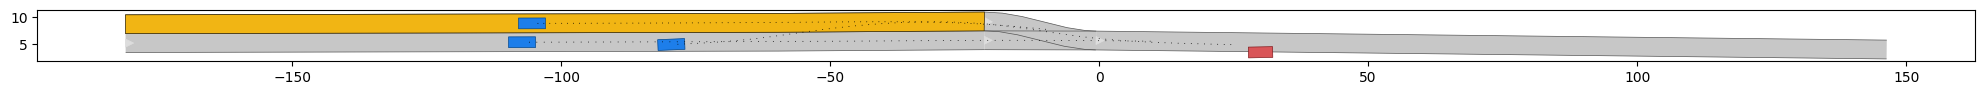

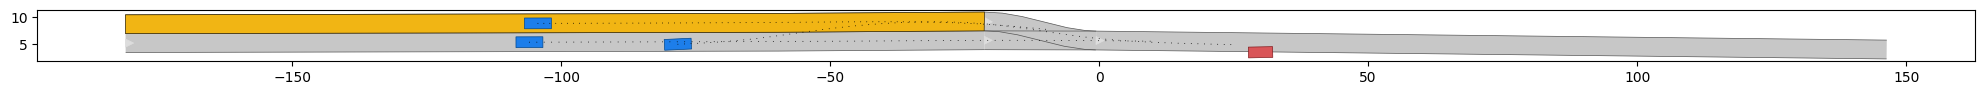

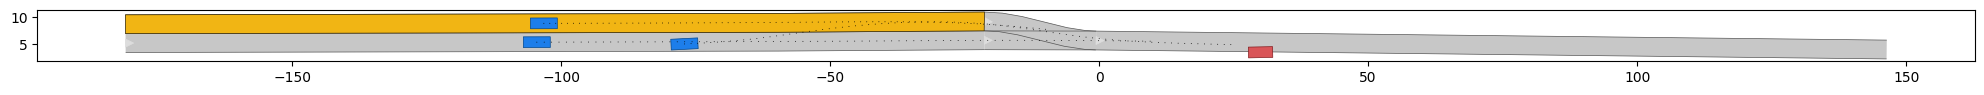

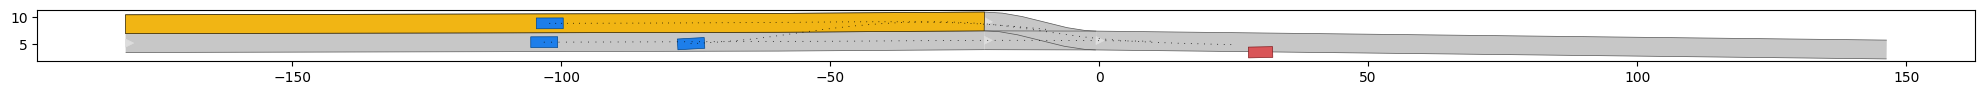

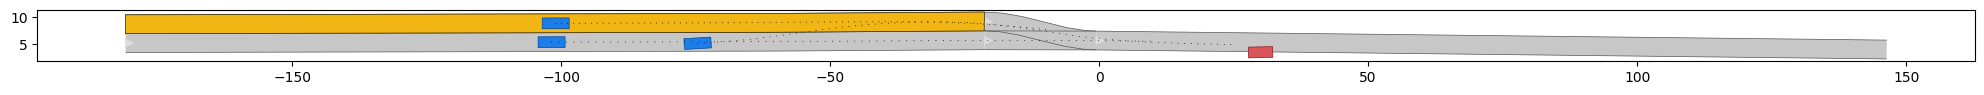

In [4]:
import numpy as np

# import necessary classes from different modules
from commonroad.geometry.shape import Rectangle
from commonroad.scenario.obstacle import StaticObstacle, ObstacleType
from commonroad.scenario.trajectory import CustomState
from commonroad.scenario.trajectory import InitialState

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# generate the static obstacle according to the specification, refer to API for details of input parameters
static_obstacle_id = scenario.generate_object_id()
static_obstacle_type = ObstacleType.PARKED_VEHICLE
static_obstacle_shape = Rectangle(width = 2.0, length = 4.5)

static_obstacle_initial_state = InitialState(position = np.array([30.0, 3.5]), orientation = 0.02, time_step = 0)

# feed in the required components to construct a static obstacle
static_obstacle = StaticObstacle(static_obstacle_id, static_obstacle_type, static_obstacle_shape, static_obstacle_initial_state)

# add the static obstacle to the scenario
scenario.add_objects(static_obstacle)

# plot the scenario for each time step
for i in range(0, 5):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()

    draw_params = MPDrawParams()
    draw_params.time_begin = i
    scenario.draw(rnd, draw_params=draw_params)

    # plot the planning problem set
    planning_problem_set.draw(rnd)
    rnd.render()
